# Problem Definition

problem is learning the purpose of the customer segmentation concepts, also known as market basket analysis, trying to understand customers and sepparate them in different groups according to their preferences, and once the division is done, this information can be given to marketing team so they can plan the strategy accordingly.

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objs as go
import scipy
from scipy import signal
from scipy.stats import shapiro
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr
import warnings
import os
import plotly as py
import plotly.graph_objs as go
warnings.filterwarnings("ignore")


In [ ]:
#import data

In [2]:
mall_customer = pd.read_csv(r'C:\Users\Lenovo\Desktop\andalusia\Mall_Customers.csv')
#view Heads of data
mall_customer.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [77]:
#analsys data 
mall_customer.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000,1.415000
std,57.879185,0.497633,13.969007,26.264721,25.823522,1.450273
min,1.000000,0.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,0.000000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000,3.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000,4.000000


In [4]:
# check null 
mall_customer.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Exploratory data analysis (EDA)

In [19]:
# calculate correlation 
mall_customer.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


There seems to be some correlation between age and spending score.

Analysing Categorical columns

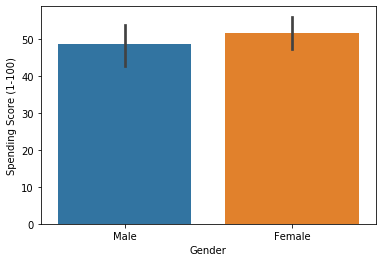

In [5]:
sns.barplot( y = mall_customer['Spending Score (1-100)'], x = mall_customer['Gender'])

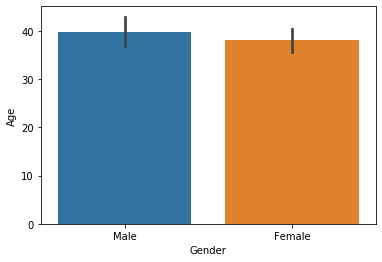

In [6]:
sns.barplot( y = mall_customer['Age'], x = mall_customer['Gender'])

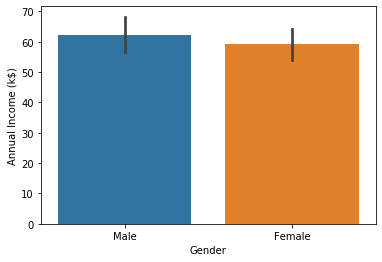

In [7]:
sns.barplot( y = mall_customer['Annual Income (k$)'], x = mall_customer['Gender'])

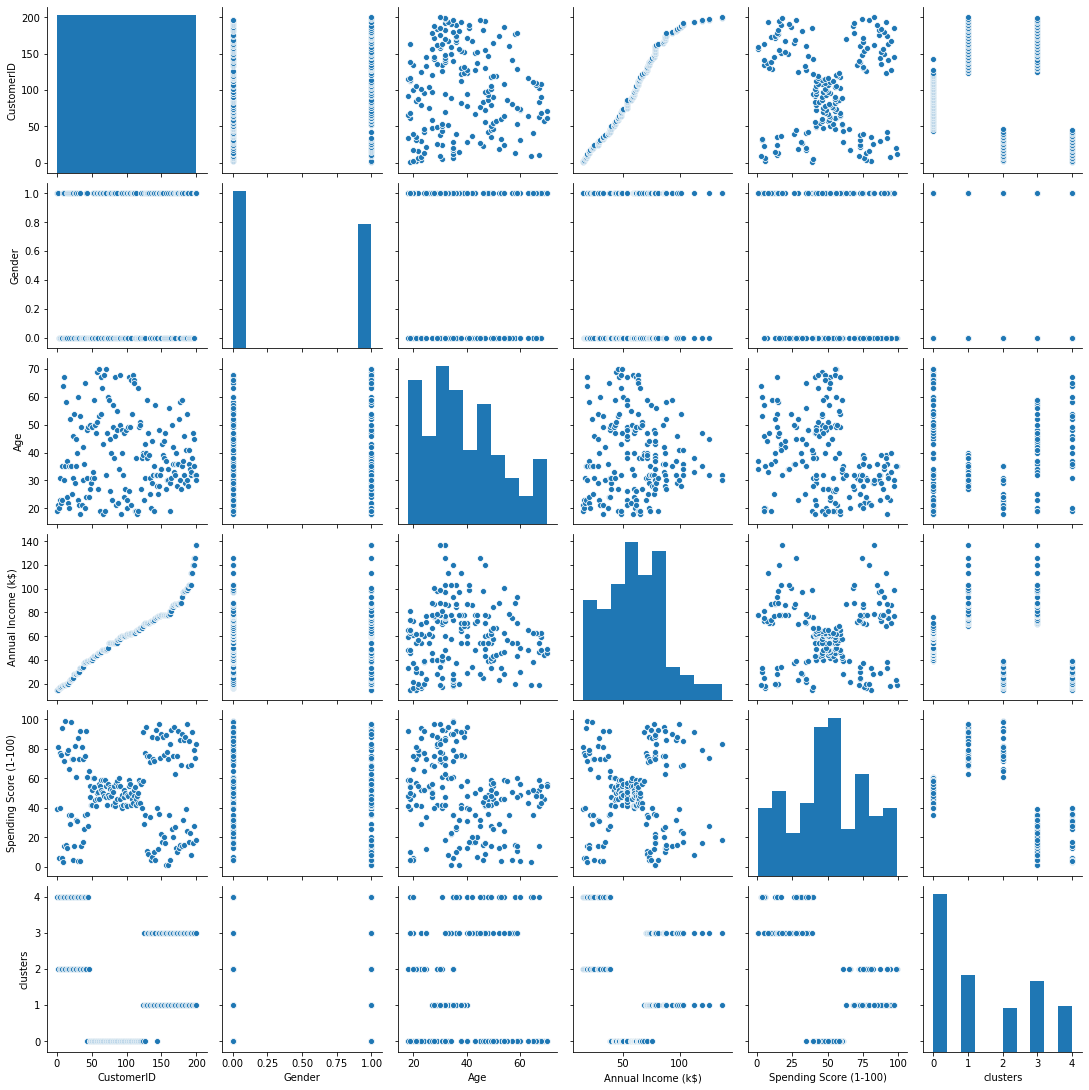

In [78]:
#summary all visual
sns.pairplot(mall_customer)

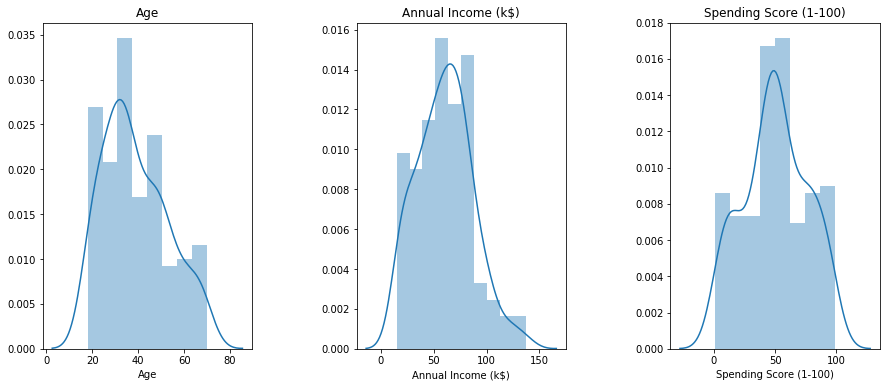

In [10]:
#Univariate distribution
plt.figure(1 , figsize = (15 , 6))
n = 0 

#List of graphs
for x in ['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(mall_customer[x])
    plt.title('{}'.format(x))
plt.show()

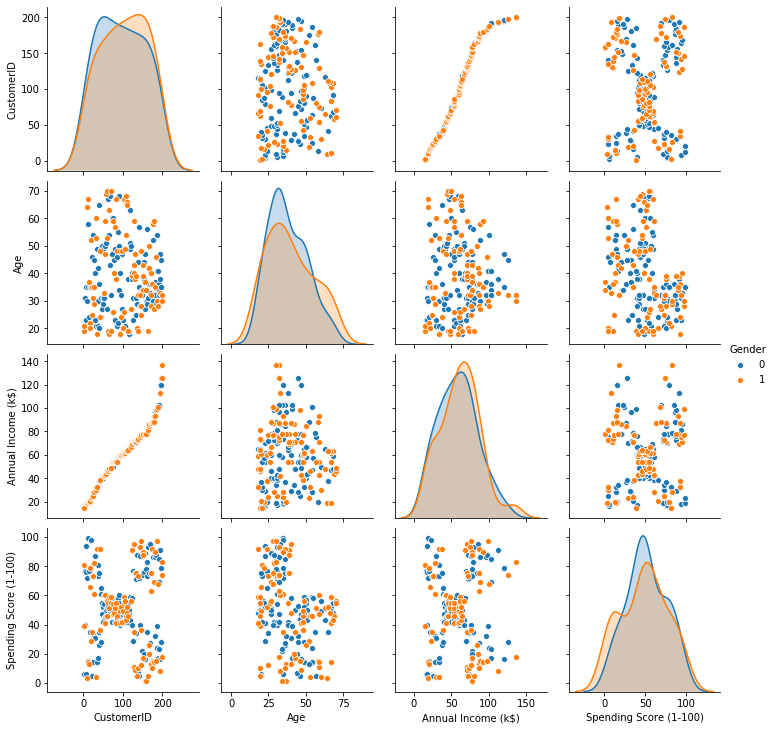

In [18]:
#Pairplot with variables we want to study
sns.pairplot(data=mall_customer, hue='Gender')

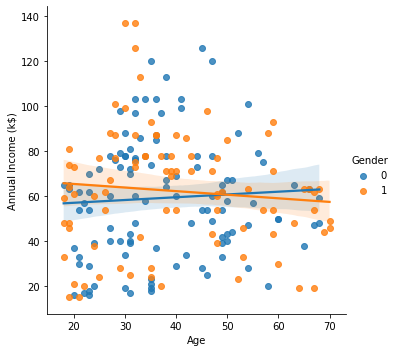

In [14]:

#Age and Annual Income
sns.lmplot(x = "Age", y = "Annual Income (k$)", data = mall_customer, hue = "Gender")

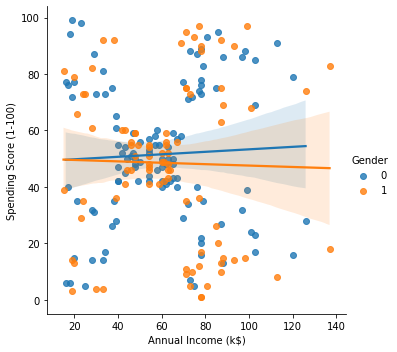

In [15]:
#Spending Score and Annual Income
sns.lmplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = mall_customer, hue = "Gender")

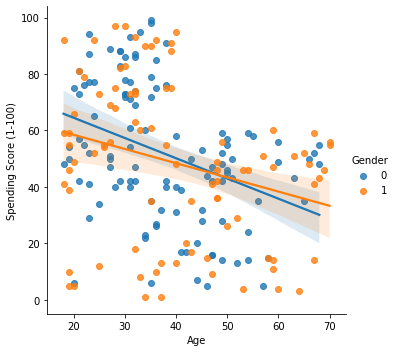

In [16]:
#Age and Annual Income
sns.lmplot(x = "Age", y = "Spending Score (1-100)", data = mall_customer, hue = "Gender")

In this last graphic we get to see something we could predict, young people tend to spend way more than older people. That can be due to many reasons: young people usually have more free time than old people, shopping malls tend to have shops that target young people such as videogames and tech stores, etc.



# Hypothesis testing

1- Gaussian distribution 
Assumptions
negative reasons choice are independent and identically distributed (iid).

Interpretation
H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.

In [58]:
data_mall_customer = np.array(mall_customer.Age.value_counts().tolist(),dtype='float64')
stat, p = shapiro(data_mall_customer)
print(p)

0.0007271775975823402


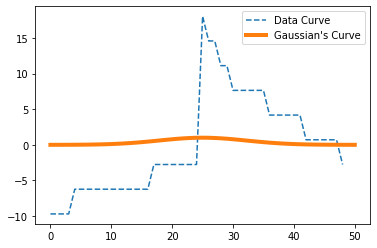

In [60]:
def central_limit_theorem(rv):
    return (rv - np.average(rv))/(np.std(rv)/len(rv)**.5)
def handle_gaussian(l):
    # Make list to be as gaussian dist.
    l = l.tolist()
    l.sort()
    n = len(l)
    i = int(n/2)
    halve1 = l[0:i]
    halve2 = l[i+1:n-1]
    halve2.reverse()
    return halve1 + halve2
gaussian = signal.gaussian(len(data_mall_customer), std=np.std(central_limit_theorem(data_mall_customer)))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(central_limit_theorem(handle_gaussian(data_mall_customer)), label='Data Curve', linestyle='--')
ax.plot(gaussian,label="Gaussian's Curve", linewidth=4)
ax.legend()

plt.show()

We reject H0 and has no Gaussian's dist

2 - Spearman’s Rank Correlation
Assumptions

Observations in each sample are independent and identically distributed (iid). Observations in each sample can be ranked.

Interpretation

H0: the two samples are independent.

H1: there is a dependency between the samples.

In [75]:
data1, data2 = np.array(mall_customer['Annual Income (k$)'].tolist()), np.array(mall_customer['Spending Score (1-100)'].tolist())
corr, p = spearmanr(data1, data2)
print(p)

0.9122697727000879


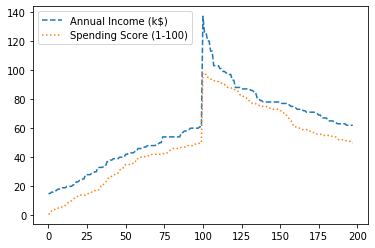

In [76]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(handle_gaussian(data1), label='Annual Income (k$)', linestyle='--')
ax.plot(handle_gaussian(data2),label="Spending Score (1-100)", linestyle=':')
ax.legend()

plt.show()

We Accept H0 and has two samples are independent

# Machine Learning Modelling

hierarchy clustering

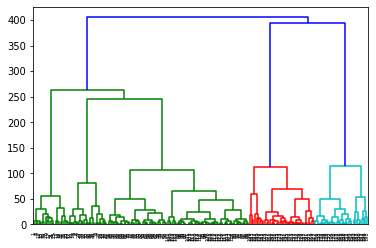

In [17]:
mall_customer_feature = mall_customer.iloc[:,3:5]
X = mall_customer_feature.values
dendro=hierarchy.dendrogram(hierarchy.linkage(X,method='ward'))

5 Clusters 

Clustering using K- means

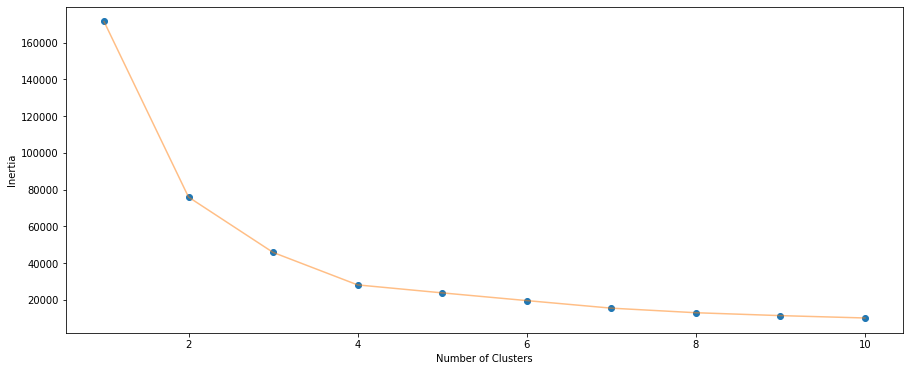

In [32]:
#Age and Spending Score
X1 = mall_customer[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
counter = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    counter.append(algorithm.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , counter , 'o')
plt.plot(np.arange(1 , 11) , counter , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()


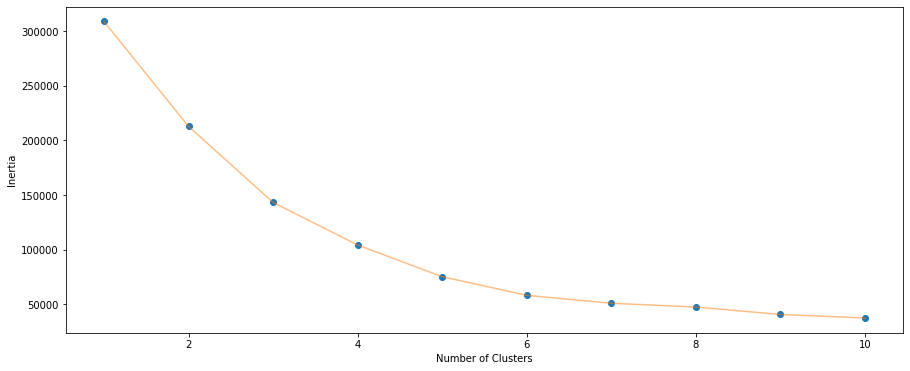

In [38]:
# all  values for the elbow
X = mall_customer.loc[:,["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
inertia = []
k = range(1,11)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(k , inertia , 'o')
plt.plot(k  , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()



In [54]:
#Visualization of the Clusters
cluster = KMeans(n_clusters = 5, random_state= 5)
y_KMeans = cluster.fit_predict(X)
mall_customer['clusters'] = cluster.labels_

Cluster_graph = go.Scatter3d(
    x= X['Spending Score (1-100)'],
    y= X['Annual Income (k$)'],
    z= X['Age'],
    mode='markers',
     marker=dict(
        color = mall_customer['clusters'], 
        size= 10,
        line=dict(
            color= mall_customer['clusters'],
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending Score (1-100)'),
            yaxis = dict(title  = 'Annual Income (k$)'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=Cluster_graph, layout=layout)
py.offline.iplot(fig)


After plotting the results obtained by K-means on this 3D graphic, it's our job now to identify and describe the five clusters that have been created:

Yellow Cluster - The yellow cluster groups young people with moderate to low annual income who actually spend a lot.
Purple Cluster - The purple cluster groups reasonably young people with pretty decent salaries who spend a lot.
Pink Cluster - The pink cluster basically groups people of all ages whose salary isn't pretty high and their spending score is moderate.
Orange Cluster - The orange cluster groups people who actually have pretty good salaries and barely spend money, their age usually lays between thirty and sixty years.
Blue Cluster - The blue cluster groups whose salary is pretty low and don't spend much money in stores, they are people of all ages.

# Validation